In [1]:
import numpy as np
import pandas as pd
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)


In [46]:
df = pd.read_csv("NZDUSD.csv", index_col=['Date'], infer_datetime_format=True, parse_dates=['Date'])

In [47]:
df = df.reset_index()

In [48]:
df.loc[df.Volume == 0, "Volume"] = df["Volume"].mean()

In [49]:
y = df["Close"].values.reshape(-1, 1)
X = df[["Open", "Low", "High", "Volume"]].values
Date = []
for date in df["Date"]:
    Date.append(date)

In [50]:
n_train = len(y) * 8 // 10
X_train, y_train, X_test, y_test = X[:n_train], y[:n_train], X[n_train:], y[n_train:]
date_train, date_test = Date[:n_train], Date[n_train:]

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout;

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))


In [120]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [125]:
history = model.fit(X_train, y_train, epochs=200, batch_size=32,  verbose=1, validation_data=(X_test, y_test))

Train on 3044 samples, validate on 761 samples
Epoch 1/200
3044/3044 [==============================] - 0s 71us/step - loss: 1.2742e-05 - mse: 1.2742e-05 - mae: 0.0027 - val_loss: 1.4230e-04 - val_mse: 1.4230e-04 - val_mae: 0.0063
Epoch 2/200
3044/3044 [==============================] - 0s 62us/step - loss: 1.1966e-05 - mse: 1.1966e-05 - mae: 0.0026 - val_loss: 1.5039e-04 - val_mse: 1.5039e-04 - val_mae: 0.0050
Epoch 3/200
3044/3044 [==============================] - 0s 63us/step - loss: 1.4831e-05 - mse: 1.4831e-05 - mae: 0.0029 - val_loss: 1.3901e-04 - val_mse: 1.3901e-04 - val_mae: 0.0056
Epoch 4/200
3044/3044 [==============================] - 0s 65us/step - loss: 1.2337e-05 - mse: 1.2337e-05 - mae: 0.0026 - val_loss: 1.4475e-04 - val_mse: 1.4475e-04 - val_mae: 0.0078
Epoch 5/200
3044/3044 [==============================] - 0s 63us/step - loss: 1.4451e-05 - mse: 1.4451e-05 - mae: 0.0029 - val_loss: 1.3900e-04 - val_mse: 1.3900e-04 - val_mae: 0.0069
Epoch 6/200
3044/3044 [==========

3044/3044 [==============================] - 0s 60us/step - loss: 1.4172e-05 - mse: 1.4172e-05 - mae: 0.0029 - val_loss: 1.3053e-04 - val_mse: 1.3053e-04 - val_mae: 0.0048
Epoch 90/200
3044/3044 [==============================] - 0s 53us/step - loss: 1.0006e-05 - mse: 1.0006e-05 - mae: 0.0024 - val_loss: 1.2545e-04 - val_mse: 1.2545e-04 - val_mae: 0.0049
Epoch 91/200
3044/3044 [==============================] - 0s 56us/step - loss: 9.9103e-06 - mse: 9.9103e-06 - mae: 0.0024 - val_loss: 1.3899e-04 - val_mse: 1.3899e-04 - val_mae: 0.0048
Epoch 92/200
3044/3044 [==============================] - 0s 57us/step - loss: 1.0978e-05 - mse: 1.0978e-05 - mae: 0.0025 - val_loss: 1.2493e-04 - val_mse: 1.2493e-04 - val_mae: 0.0050
Epoch 93/200
3044/3044 [==============================] - 0s 52us/step - loss: 1.1089e-05 - mse: 1.1089e-05 - mae: 0.0025 - val_loss: 1.6661e-04 - val_mse: 1.6661e-04 - val_mae: 0.0069
Epoch 94/200
3044/3044 [==============================] - 0s 55us/step - loss: 1.1919e-0

3044/3044 [==============================] - 0s 61us/step - loss: 1.0181e-05 - mse: 1.0181e-05 - mae: 0.0024 - val_loss: 1.1038e-04 - val_mse: 1.1038e-04 - val_mae: 0.0043
Epoch 178/200
3044/3044 [==============================] - 0s 54us/step - loss: 9.4094e-06 - mse: 9.4094e-06 - mae: 0.0023 - val_loss: 1.0894e-04 - val_mse: 1.0894e-04 - val_mae: 0.0043
Epoch 179/200
3044/3044 [==============================] - 0s 56us/step - loss: 8.4320e-06 - mse: 8.4320e-06 - mae: 0.0022 - val_loss: 1.1361e-04 - val_mse: 1.1361e-04 - val_mae: 0.0045
Epoch 180/200
3044/3044 [==============================] - 0s 53us/step - loss: 9.1606e-06 - mse: 9.1606e-06 - mae: 0.0023 - val_loss: 1.2400e-04 - val_mse: 1.2400e-04 - val_mae: 0.0051
Epoch 181/200
3044/3044 [==============================] - 0s 55us/step - loss: 9.5481e-06 - mse: 9.5481e-06 - mae: 0.0023 - val_loss: 1.2149e-04 - val_mse: 1.2149e-04 - val_mae: 0.0052
Epoch 182/200
3044/3044 [==============================] - 0s 58us/step - loss: 1.29

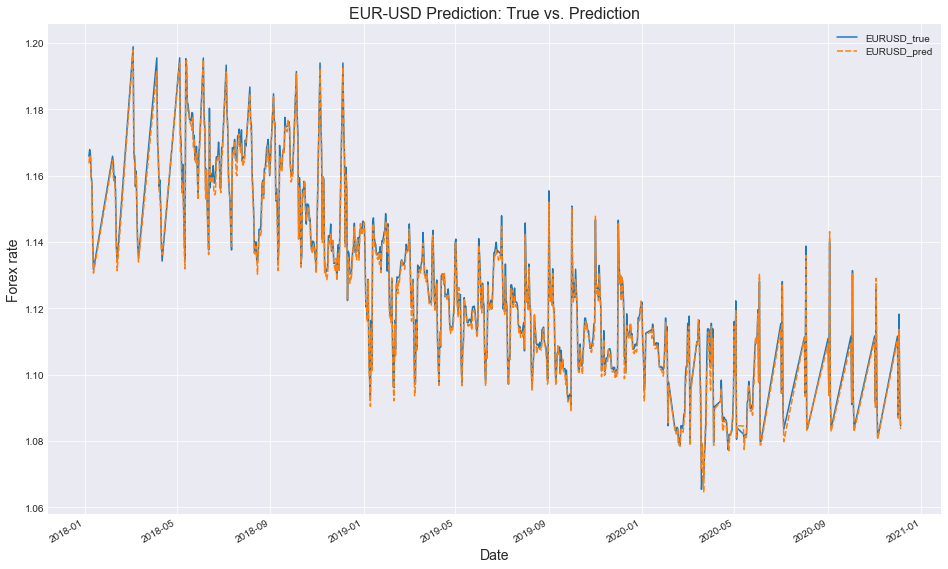

In [22]:
df_plot = pd.DataFrame({"EURUSD_true": y_test[:,0], 'EURUSD_pred': ypred[:,0]}, index=date_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('EUR-USD Prediction: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Forex rate', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

prediction = load_model('EURUSD.h5')
ypred = prediction.predict(X_test)
print(r2_score(y_test, ypred))
print(mean_absolute_error(y_test, ypred))
print(mean_squared_error(y_test, ypred))

0.9942083583115602
0.0015822033215696972
4.116579243155309e-06


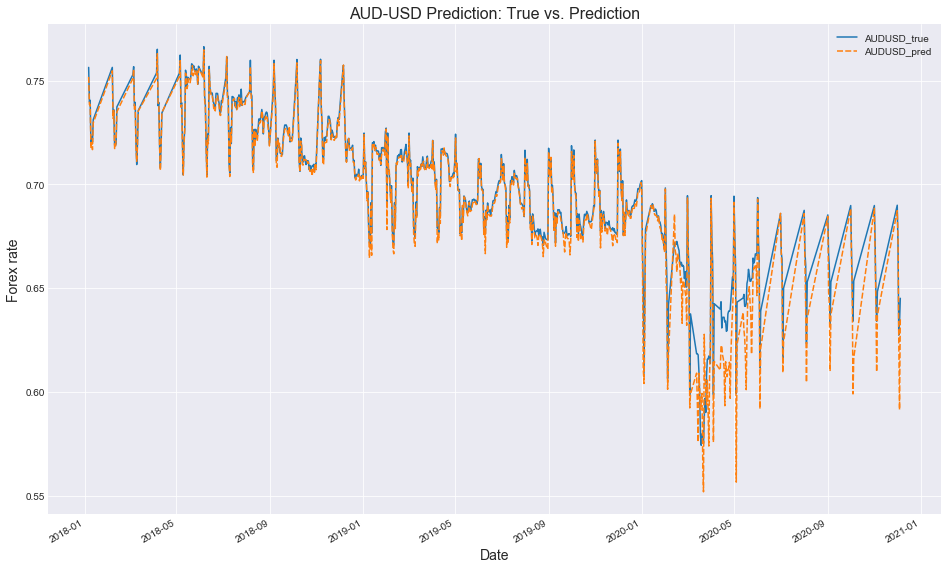

In [31]:
df_plot = pd.DataFrame({"AUDUSD_true": y_test[:,0], 'AUDUSD_pred': ypred[:,0]}, index=date_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('AUD-USD Prediction: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Forex rate', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [30]:
prediction = load_model('AUDUSD.h5')
ypred = prediction.predict(X_test)
print(r2_score(y_test, ypred))
print(mean_absolute_error(y_test, ypred))
print(mean_squared_error(y_test, ypred))

0.9431403191278739
0.0038940359859992893
6.405184539855207e-05


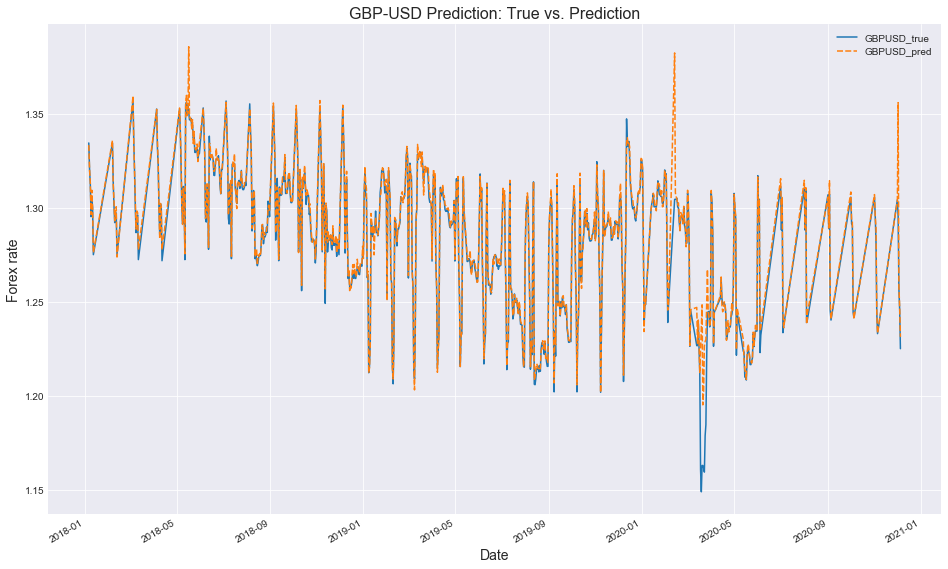

In [45]:
df_plot = pd.DataFrame({"GBPUSD_true": y_test[:,0], 'GBPUSD_pred': ypred[:,0]}, index=date_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('GBP-USD Prediction: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Forex rate', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [44]:
prediction = load_model('GBPUSD.h5')
ypred = prediction.predict(X_test)
print(r2_score(y_test, ypred))
print(mean_absolute_error(y_test, ypred))
print(mean_squared_error(y_test, ypred))

0.95227712565079
0.002830320334315459
6.329300167139839e-05


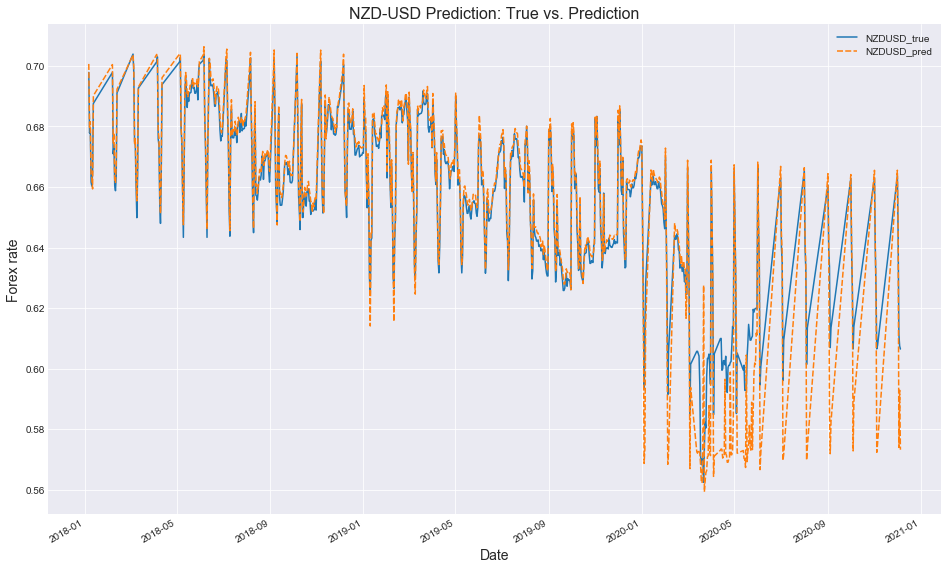

In [53]:
df_plot = pd.DataFrame({"NZDUSD_true": y_test[:,0], 'NZDUSD_pred': ypred[:,0]}, index=date_test)

# Create subplots to plot graph and control axes
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(data=df_plot)

# Format the ticks
loc = mdates.AutoDateLocator()
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(loc))

# Set figure title
plt.title('NZD-USD Prediction: True vs. Prediction', fontsize=16)
# Set x label
plt.xlabel('Date', fontsize=14)
# Set y label
plt.ylabel('Forex rate', fontsize=14)

# Rotate and align the x labels
fig.autofmt_xdate()

# Show plot
plt.show()

In [52]:
prediction = load_model('NZDUSD.h5')
ypred = prediction.predict(X_test)
print(r2_score(y_test, ypred))
print(mean_absolute_error(y_test, ypred))
print(mean_squared_error(y_test, ypred))

0.8629533457498827
0.005038815234456204
9.859859277674504e-05
